
    Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.
    Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).
    Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).



y = 2.620538882402765x + 444.1773573243596


0.7876386635293682

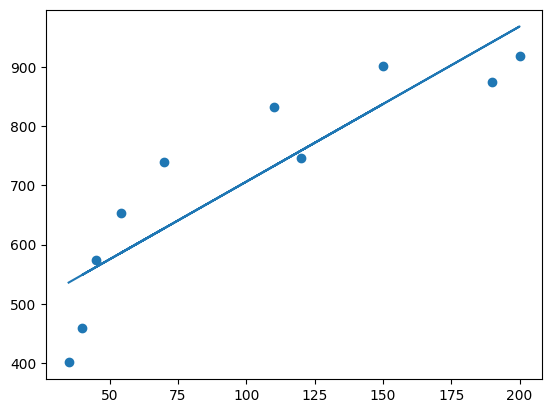

In [1]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
Y  = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
# y = b1 * x + b0, x - влияющий параметр
b1 = (np.mean(X * Y) - np.mean(Y) * np.mean(X)) / (np.mean(X ** 2) - np.mean(X) ** 2)
b0 = np.mean(Y) - b1 * np.mean(X)
print(f'y = {b1}x + {b0}')
plt.scatter(X, Y)
plt.plot(X, b1 * X + b0)
R = np.corrcoef(X, Y) ** 2
R[0, 1]

In [14]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y  = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

x = x.reshape(-1, 1)
model.fit(x, y)
r_sq = model.score(x, y)
print(f'Коэф. детерм. {r_sq}')
print(f'intercept {model.intercept_}')
print(f'slope {model.coef_}')


Коэф. детерм. 0.7876386635293686
intercept 444.17735732435943
slope [2.62053888]


In [8]:
y_model = 2.62053888 * x + 444.17735732435943
y_model

array([[535.89621812],
       [562.10160692],
       [942.07974452],
       [968.28513332],
       [548.99891252],
       [627.61507892],
       [585.68645684],
       [837.25818932],
       [758.64202292],
       [732.43663412]])

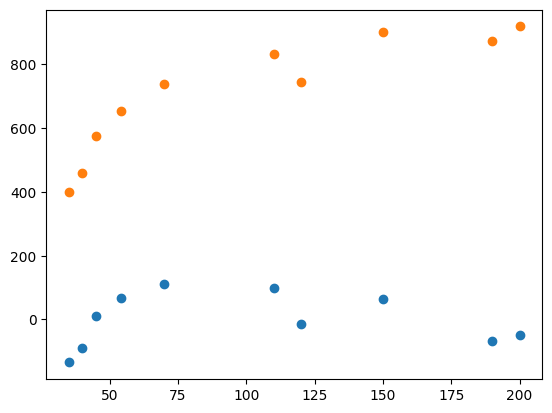

In [10]:
y_model_reshape = y_model.reshape(1, -1)
plt.scatter(x, y - y_model_reshape)
plt.scatter(x, y)

In [17]:
y_model1 = 2.62053888 * x 
y_model1

array([[ 91.7188608 ],
       [117.9242496 ],
       [497.9023872 ],
       [524.107776  ],
       [104.8215552 ],
       [183.4377216 ],
       [141.50909952],
       [393.080832  ],
       [314.4646656 ],
       [288.2592768 ]])

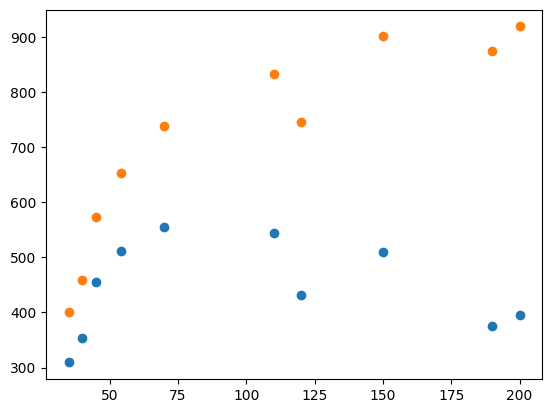

In [18]:
y_model1_reshape = y_model1.reshape(1, -1)
plt.scatter(x, y - y_model1_reshape)
plt.scatter(x, y)

In [21]:
df1 = 2 - 1
df2 = 10 - 2
ssf = sum((y_model - np.mean(y)) ** 2)

sso = np.sum((y - y_model) ** 2)

msf = ssf/df1

mso = sso/df2

F = msf/mso

F


array([0.7031815])

In [16]:
import scipy.stats as stats


stats.f.ppf(1 - 0.05, df1, df2)


5.317655071578712